In [ ]:
import numpy as np

def estimate_coeff(x,y):
  n = np.size(x)

  #mean
  m_x = np.mean(x)
  m_y = np.mean(y)

  #calculate cross deviation and deviation from x
  SS_xy = np.sum(y*x) - n*m_y*m_x
  SS_xx = np.sum(x*x) - n*m_x*m_x

  #calculating regression coefficients
  b_1 = SS_xy / SS_xx
  b_0 = m_y - b_1*m_x

  return (b_0 , b_1)

In [ ]:
import matplotlib.pyplot as plt

def plot_regression_line(x,y,b):

  #plotting the actual plots as scatter plot
  plt.scatter(x,y,color = "m" , marker = 'o' , s = 30)

  #predicted response vector
  y_pred = b[0] + b[1]*x

  plt.plot(x,y_pred , color = 'g')

  plt.xlabel("x")
  plt.ylabel("y")


Estimated coefficients:
b_0 = 1.2363636363636363
b_1 = 1.1696969696969697


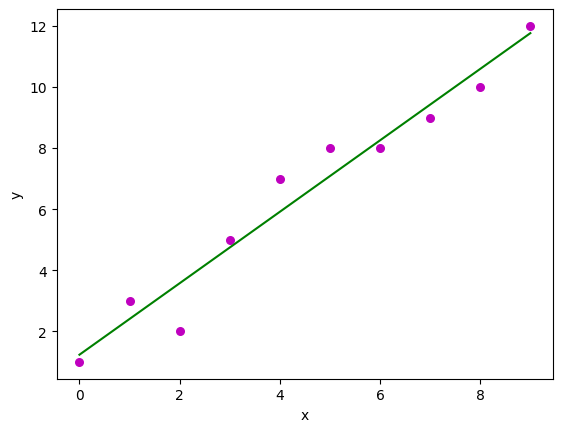

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def main():
    # observations or data
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

    # estimating coefficients
    b = estimate_coeff(x, y)
    print("Estimated coefficients:\nb_0 = {}\nb_1 = {}".format(b[0], b[1]))

    # plotting regression line
    plot_regression_line(x, y, b)
    plt.show()

def plot_regression_line(x, y, b):
    # plotting the actual plots as scatter plot
    plt.scatter(x, y, color="m", marker='o', s=30)

    # predicted response vector
    y_pred = b[0] + b[1] * x

    plt.plot(x, y_pred, color='g')

    plt.xlabel("x")
    plt.ylabel("y")

def estimate_coeff(x, y):
    n = np.size(x)

    # mean
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculate cross deviation and deviation from x
    SS_xy = np.sum(y * x) - n * m_y * m_x
    SS_xx = np.sum(x * x) - n * m_x * m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1 * m_x

    return b_0, b_1

if __name__ == "__main__":
    main()


leniar regression using scikitlearn

Estimated coefficients:
b_0 = 1.2363636363636363
b_1 = 1.1696969696969697


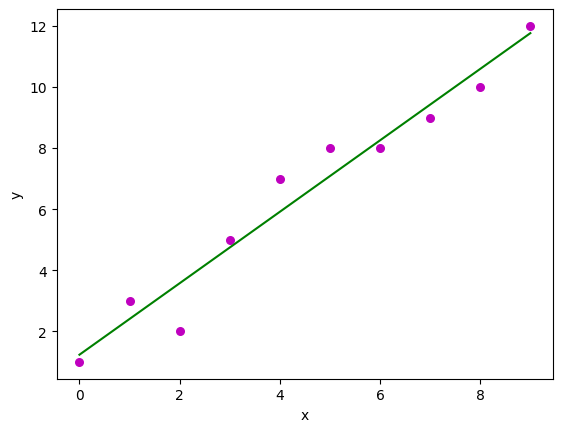

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def main():
    # observations or data
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

    # create and fit the linear regression model
    model = LinearRegression().fit(x, y)

    # get the coefficients
    b_0 = model.intercept_
    b_1 = model.coef_[0]
    print("Estimated coefficients:\nb_0 = {}\nb_1 = {}".format(b_0, b_1))

    # plotting regression line
    plt.scatter(x, y, color="m", marker='o', s=30)
    plt.plot(x, model.predict(x), color='g')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

if __name__ == "__main__":
    main()


descition tree
april 25

In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
eps = np.finfo(float).eps
from numpy import log2 as log

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/play_tennis.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df=pd.read_csv('/content/play_tennis.csv')
df = df.drop('day',axis=1)


In [4]:
df.head(14)

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [7]:
# look at the number of rows and columns
print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')

Rows: 14, Columns: 5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   wind      14 non-null     object
 4   play      14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [9]:
df.describe()

,outlook,temp,humidity,wind,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,Sunny,Mild,High,Weak,Yes
freq,5,6,7,8,9


In [10]:
def find_entropy(df):
    #target column
    target = df.keys()[-1]
    entropy = 0
    values = df[target].unique()
    #calc entropy
    for value in values:
        fraction = df[target].value_counts()[value]/len(df[target])
        entropy += -fraction*np.log2(fraction)
    return entropy

In [11]:
def average_information(df,attribute):
  target = df.keys()[-1]   #target column
  target_variables = df[target].unique()  #This gives all 'Yes' and 'No'
  variables = df[attribute].unique()    #This gives different features in that attribute (like 'Hot','Cold' in Temperature)
  entropy2 = 0
  for variable in variables:
      entropy = 0
      for target_variable in target_variables:
          num = len(df[attribute][df[attribute]==variable][df[target] ==target_variable])
          den = len(df[attribute][df[attribute]==variable])
          fraction = num/(den+eps)
          entropy += -fraction*log(fraction+eps)
      fraction2 = den/len(df)
      entropy2 += -fraction2*entropy
  return abs(entropy2)

In [12]:


def find_winner(df):
    IG = []
    for key in df.keys()[:-1]:
        IG.append(find_entropy(df)-average_information(df,key))
    return df.keys()[:-1][np.argmax(IG)]



In [13]:


def get_subtable(df, node,value):
  return df[df[node] == value].reset_index(drop=True)



In [14]:
def buildTree(df,tree=None):
    target = df.keys()[-1]   #target column

    #Here we build our decision tree

    #Get attribute with maximum information gain
    node = find_winner(df)

    #Get distinct value of that attribute e.g Salary is node and Low,Med and High are values
    attValue = np.unique(df[node])

    #Create an empty dictionary to create tree
    if tree is None:
        tree={}
        tree[node] = {}

    #We make loop to construct a tree by calling this function recursively.
    #In this we check if the subset is pure and stops if it is pure.

    for value in attValue:

        subtable = get_subtable(df,node,value)
        clValue,counts = np.unique(subtable[target],return_counts=True)

        if len(counts)==1:#Checking purity of subset
            tree[node][value] = clValue[0]
        else:
            tree[node][value] = buildTree(subtable) #Calling the function recursively

    return tree

In [15]:


#build Tree
tree = buildTree(df)



In [16]:
import pprint
pprint.pprint(tree)


{'outlook': {'Overcast': 'Yes',
             'Rain': {'wind': {'Strong': 'No', 'Weak': 'Yes'}},
             'Sunny': {'humidity': {'High': 'No', 'Normal': 'Yes'}}}}


desction tree using skikitlearn


In [17]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [29]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("/content/diabetes.csv", header=None, names=col_names)


In [32]:
pima.head()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [31]:
pima = pima.tail(-1)

In [33]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable


In [34]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [36]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [37]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6666666666666666
